# 4.10 Task Part 1 (notebook 2)

## Table of Contents
### Revisiting duplicates and missing variables
### Column Frequencies
### Column value counts to put in final project tab 5
### Bar chart for number of orders by day of week
### Histogram for pricing frequency
### 70/30 Split 
### Line chart for average price per item by day of week
### Histogram on 'order_hour_of_day' column using 24 bins for 24 hours in a day
### Bar chart from 'loyalty_flag' column showing number of customers for each flag
### Line chart for the average item price per hour
### Line chart for average number of dependents by customer age
### Scatterplot that plots prices against prices to look for anomolies
### Scatterplot of the entire merged data frame plotting age and income

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import scipy

In [2]:
# Creating path
path = r'C:\Users\Karen\Documents\Personal\Data Analytics\Career Foundry\Achievement 4\Instacart Basket Analysis'

In [3]:
# Importing data set

orders = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Checking data frame

orders.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First_Name,Last_Name,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
orders.shape

(32404859, 33)

In [9]:
# looking for missing values

orders.isnull().sum()

order_id                               0
user_id                                0
order_number                           0
orders_day_of_week                     0
order_hour_of_day                      0
days_since_prior_order           2076096
product_id                             0
add_to_cart_order                      0
reordered                              0
product_name                           0
aisle_id                               0
department_id                          0
prices                              5127
price_range_loc                        0
busiest_day                            0
busiest_days                           0
busiest_period_of_day                  0
max_order                              0
loyalty_flag                           0
mean_order_price                       0
spending_flag                          0
median_days_since_prior_order          5
regularity_flag                        5
First_Name                             0
Last_Name       

In [10]:
# looking for duplicates

orders[orders.duplicated()]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First_Name,Last_Name,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge


In [12]:
# frequencies of flag columns

orders.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_order_price', 'spending_flag', 'median_days_since_prior_order',
       'regularity_flag', 'First_Name', 'Last_Name', 'Gender', 'State', 'Age',
       'date_joined', 'number_of_dependents', 'fam_status', 'income',
       '_merge'],
      dtype='object')

In [20]:
orders['busiest_period_of_day'].value_counts()

busiest_period_of_day
Most orders       21118071
Average orders     9997651
Fewest orders      1289137
Name: count, dtype: int64

In [27]:
21118071+9997651+1289137

32404859

In [30]:
orders['price_range_loc'].value_counts()

price_range_loc
Mid-range product     21860860
Low_range product     10126321
High-range product      417678
Name: count, dtype: int64

In [32]:
21860860+10126321+417678

32404859

In [22]:
orders['busiest_day'].value_counts()

busiest_day
Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: count, dtype: int64

In [31]:
22416875+6204182+3783802

32404859

In [23]:
orders['busiest_days'].value_counts()

busiest_days
Regularly busy     12916111
Busiest days       11864412
Least busy days     7624336
Name: count, dtype: int64

In [33]:
12916111+11864412+7624336

32404859

In [24]:
orders['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [34]:
15876776+10284093+6243990

32404859

In [25]:
orders['spending_flag'].value_counts()

spending_flag
Low spender     31770614
High spender      634245
Name: count, dtype: int64

In [35]:
31770614+634245

32404859

In [37]:
orders['regularity_flag'].value_counts(dropna=False)

regularity_flag
Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
NaN                             5
Name: count, dtype: int64

In [38]:
21559853+7208564+3636437+5

32404859

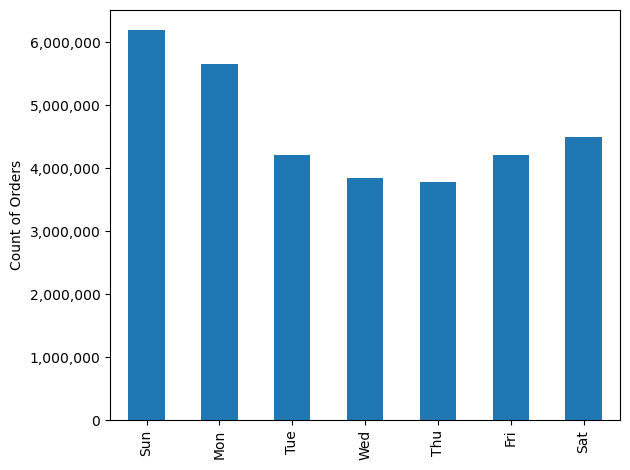

In [93]:
# Bar chart for number of orders by day of week.

# Create the bar plot
bar = orders['orders_day_of_week'].value_counts().sort_index().plot.bar()

# Set custom axis labels
bar.set_xlabel("")  # Set an empty string as the x-axis label
bar.set_ylabel("Count of Orders")

# Customize the x-axis ticks and labels
custom_xticks = range(7)  # Define your custom tick positions (e.g., for days of the week)
custom_xlabels = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]  # Define your custom tick labels

bar.set_xticks(custom_xticks)
bar.set_xticklabels(custom_xlabels)

# Format y-axis tick labels to display full numbers
def format_func(value, tick_number):
    return f'{int(value):,}'  # Format as integers with thousands separators

bar.yaxis.set_major_formatter(FuncFormatter(format_func))

plt.tight_layout()

# Show the plot
plt.show()

In [94]:
# Saving the bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

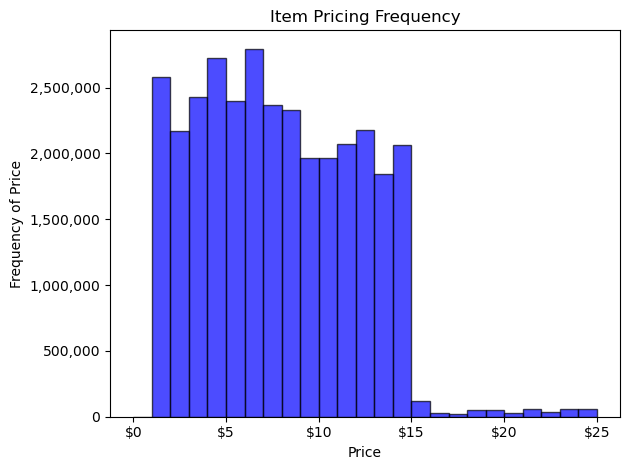

In [7]:
# Histogram for pricing frequency

# Define custom bin edges to create separated bars
bins = np.arange(0, 26, 1)

# Creating a histogram with custom bin edges
hist = orders['prices'].plot.hist(bins=bins, edgecolor='k', alpha=0.7, color='b')

# Set custom axis labels
hist.set_xlabel("Price")
hist.set_ylabel("Frequency of Price")

# Add a title to the histogram
hist.set_title("Item Pricing Frequency")

# Customize the x-axis ticks and labels
custom_xticks = [0, 5, 10, 15, 20, 25] 
custom_xlabels = ["$0", "$5", "$10", "$15", "$20", "$25"] 

hist.set_xticks(custom_xticks)
hist.set_xticklabels(custom_xlabels)

# Format x-axis tick labels as dollars
def format_dollars(value, tick_number):
    return f'${int(value):,}'  # Format as dollars with thousands separators

hist.xaxis.set_major_formatter(FuncFormatter(format_dollars))

# Format y-axis tick labels to display full numbers
def format_func(value, tick_number):
    return f'{int(value):,}'  # Format as integers with thousands separators

hist.yaxis.set_major_formatter(FuncFormatter(format_func))

plt.tight_layout()

# Show the plot
plt.show()

In [8]:
# Saving the histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [14]:
# Creating a 70/30 split in the data frame to create a subset to make the line chart from

np.random.seed(4)
dev = np.random.rand(len(orders)) <= 0.7

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
# Store 70% of the sample in the data frame 'big'

big = orders[dev]

In [17]:
# Store 30% of the sample in the data frame 'small'

small = orders[~dev]

In [70]:
len(orders)

32404859

In [71]:
len(small) + len(big)

32404859

In [28]:
# Creating smaller data frame with only needed columns for line chart

df_2 = small[['orders_day_of_week','prices']]

In [73]:
df_2.shape

(9721098, 2)

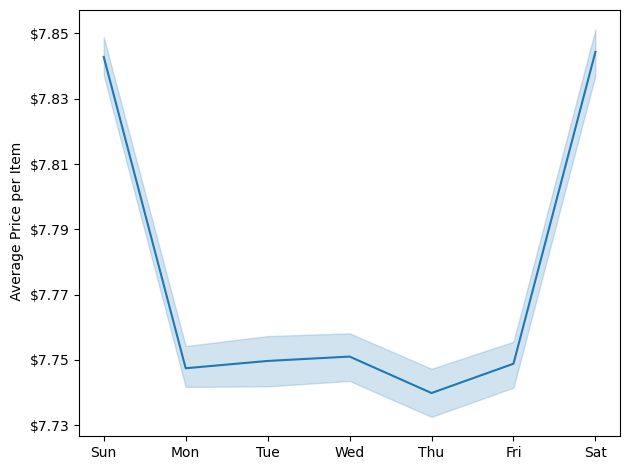

In [29]:
# Creating line chart from 'small' sample set for average item price by day of week

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')


# Set custom axis labels
line.set_xlabel("")  # Set an empty string as the x-axis label
line.set_ylabel(" Average Price per Item")

# Customize the x-axis ticks and labels
custom_xticks = range(7)  # Define your custom tick positions (e.g., for days of the week)
custom_xlabels = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]  # Define your custom tick labels

line.set_xticks(custom_xticks)
line.set_xticklabels(custom_xlabels)

# Format y-axis tick labels to display dollars and cents
def format_dollars_and_cents(value, tick_number):
    dollars, cents = divmod(value, 1)
    cents = int(cents * 100)
    return f'${int(dollars):,}.{cents:02}'  # Format as dollars and cents

line.yaxis.set_major_formatter(FuncFormatter(format_dollars_and_cents))

plt.tight_layout()

# Show the plot
plt.show()

In [107]:
# Saving the line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))

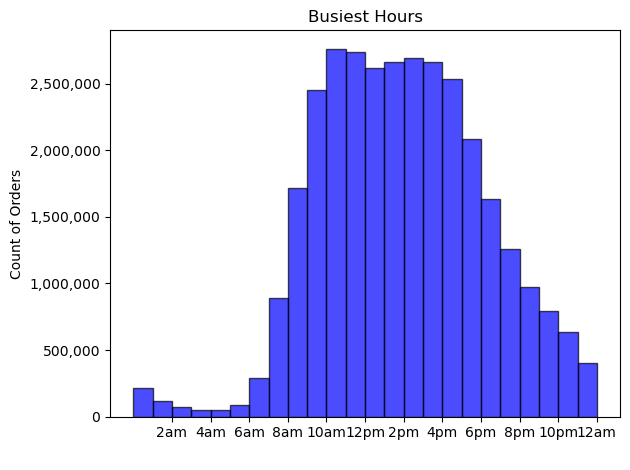

In [10]:
# Creating a histogram on 'order_hour_of_day' column using 24 bins for 24 hours in a day


# Define custom bin edges to create separated bars
bins = np.arange(0, 25, 1)

hist2 = orders['order_hour_of_day'].plot.hist(bins = bins, edgecolor = 'k', alpha = 0.7, color = 'b')

# Set custom axis labels
hist2.set_xlabel(" ")
hist2.set_ylabel("Count of Orders")

# Add a title to the histogram
hist2.set_title("Busiest Hours")

# Customize the x-axis ticks and labels
custom_xticks = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]  
# Define your custom tick positions
custom_xlabels = ['2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm', '12am']  

# Define your custom tick labels
hist2.set_xticks(custom_xticks)
hist2.set_xticklabels(custom_xlabels)

# Format y-axis tick labels to display full numbers
def format_func(value, tick_number):
    return f'{int(value):,}'  # Format as integers with thousands separators

hist2.yaxis.set_major_formatter(FuncFormatter(format_func))

plt.tight_layout()

# Show the plot
plt.show()

In [11]:
# Saving the histogram (hist2)

hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

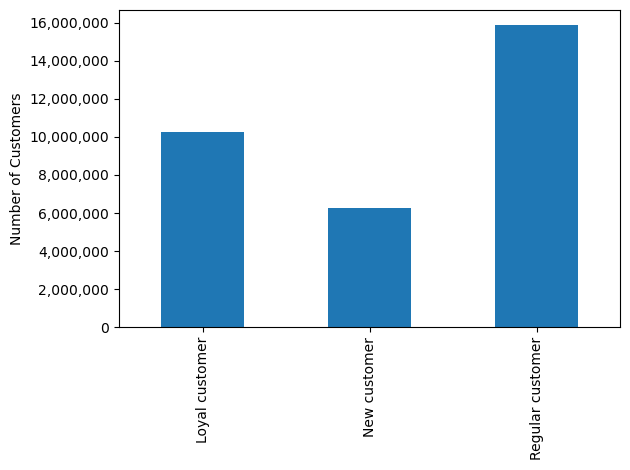

In [99]:
# Creating bar chart from 'loyalty_flag' column

bar2 = orders['loyalty_flag'].value_counts().sort_index().plot.bar()

# Set custom axis labels
bar2.set_xlabel("")
bar2.set_ylabel("Number of Customers")

# Format y-axis tick labels to display full numbers
def format_func(value, tick_number):
    return f'{int(value):,}'  # Format as integers with thousands separators

bar2.yaxis.set_major_formatter(FuncFormatter(format_func))

plt.tight_layout()

plt.show()


In [100]:
# Saving bar chart (bar2)

bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [19]:
# Creating smaller data frame with only needed columns for line chart

df_1 = small[['order_hour_of_day','prices']]

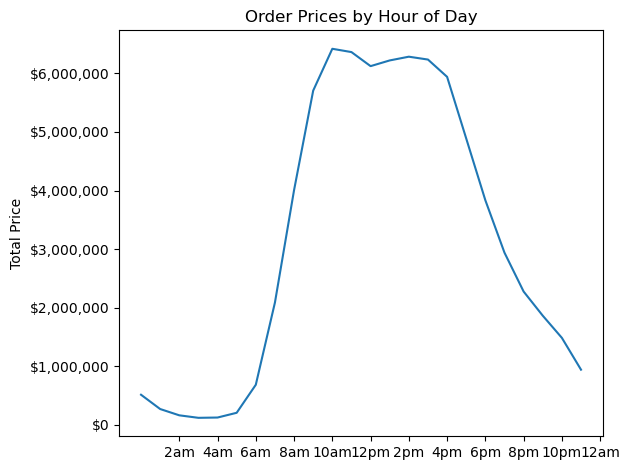

In [22]:
# Order prices by hour of the day using the 'small' data set.

# Calculate the total prices per hour of the day
total_prices_per_hour = df_1.groupby('order_hour_of_day')['prices'].sum().reset_index()

# Creating line chart from 'small' sample set
line1 = sns.lineplot(data=total_prices_per_hour, x='order_hour_of_day', y='prices')

# Set custom axis labels
line1.set_xlabel("") 
line1.set_ylabel("Total Price")

# Add a title to the line graph
line1.set_title("Order Prices by Hour of Day")

# Customize the x-axis ticks and labels
custom_xticks = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]  # Define your custom tick positions
custom_xlabels = ['2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm', '12am']  # Define your custom tick labels

line1.set_xticks(custom_xticks)
line1.set_xticklabels(custom_xlabels)

# Format y-axis tick labels to display dollars
def format_dollars(value, tick_number):
    dollars = int(value)
    return f'${dollars:,}'  # Include the dollar sign and format as dollars

line1.yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.tight_layout()

# Show the plot
plt.show()

In [34]:
# Saving line graph (line1)

line1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_total_prices_by_hour.png'))

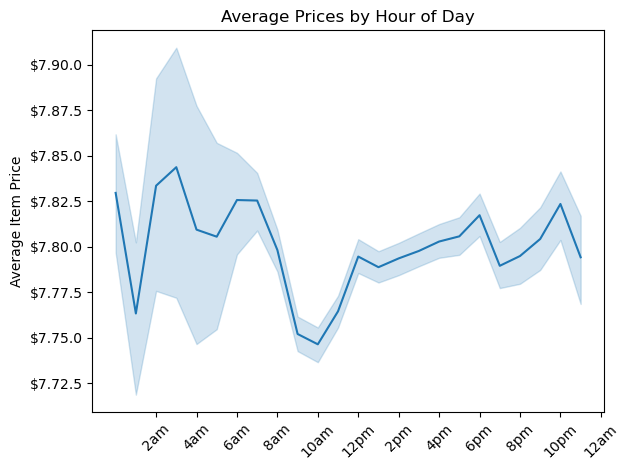

In [32]:
# Use a line chart to visualize the average item price per hour

line2 = sns.lineplot(data=df_1, x='order_hour_of_day', y='prices')

# Set custom axis labels
plt.xlabel("")
plt.ylabel("Average Item Price")

# Add a title to the line graph
line2.set_title("Average Prices by Hour of Day")

# Customize the x-axis ticks and labels
custom_xticks = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
custom_xlabels = ['2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm', '12am']

line2.set_xticks(custom_xticks)
line2.set_xticklabels(custom_xlabels)

plt.xticks(custom_xticks, custom_xlabels, rotation=45)  # Rotate x-axis labels for readability

# Format y-axis tick labels to display dollars and cents (rounded to 2 decimal places)
def format_dollars_and_cents(value, tick_number):
    dollars, cents = divmod(value, 1)
    cents = round(cents * 100, 2)  # Round to 2 decimal places
    return f'${int(dollars):,}.{cents:02}'  # Include the dollar symbol and format as dollars and cents

line2.yaxis.set_major_formatter(FuncFormatter(format_dollars_and_cents))


plt.tight_layout()

# Show the plot
plt.show()

In [35]:
# Saving line graph (line2)

line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_by_hour.png'))

In [108]:
# Creating smaller data frame with only needed columns for line chart

df_3 = small[['Age', 'number_of_dependents']]

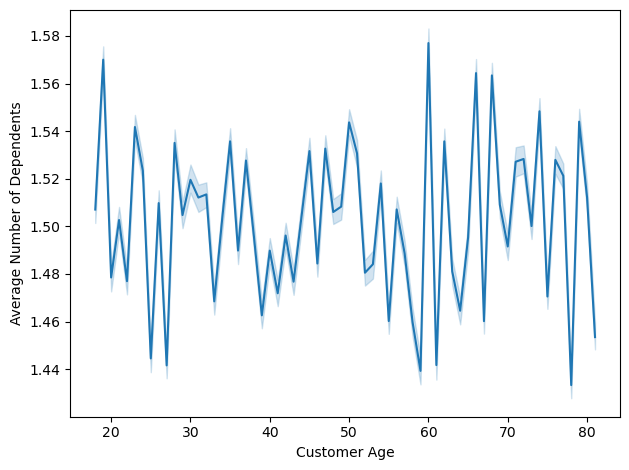

In [109]:
# Creating line chart from 'small' sample set for average number of dependents by customer age.

line2 = sns.lineplot(data = df_3, x = 'Age',y = 'number_of_dependents')

# Set custom axis labels
line2.set_xlabel("Customer Age")  # Set an empty string as the x-axis label
line2.set_ylabel("Average Number of Dependents")

plt.tight_layout()

# Show the plot
plt.show()

In [110]:
# Saving line graph (line2)

line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_and_dependents.png'))

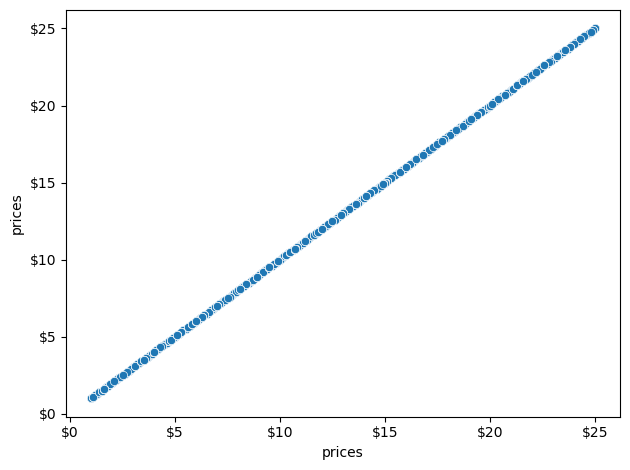

In [115]:
# Creating a scatterplot that plots prices against prices to look for anomolies.

sctplt = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_custs_merge)

# Format x-axis tick labels as dollars
def format_dollars(value, tick_number):
    return f'${int(value):,}' 

# Format y-axis tick labels as dollars
def format_dollars(value, tick_number):
    return f'${int(value):,}'  # Format as dollars with thousands separators

sctplt.yaxis.set_major_formatter(FuncFormatter(format_dollars))
sctplt.xaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.tight_layout()

# Show the plot
plt.show()

In [116]:
# Saving the scatterplot

sctplt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sctplt_prices.png'))

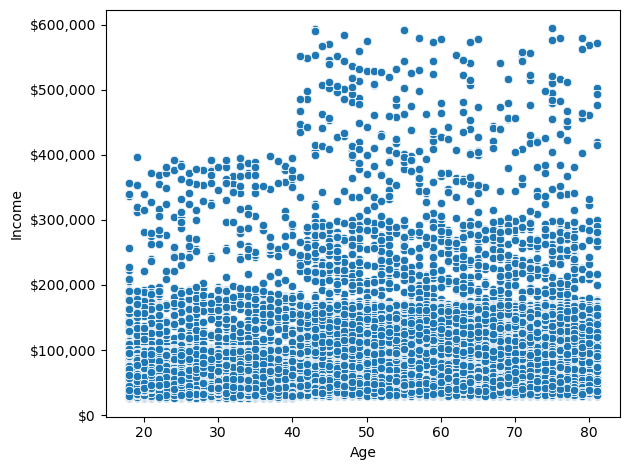

In [112]:
# Creating scatterplot of the entire merged data frame plotting age and income.

sctrplt2 = sns.scatterplot(x= 'Age', y = 'income', data = ords_prods_custs_merge)

# Set custom axis labels
sctrplt2.set_xlabel("Age")  
sctrplt2.set_ylabel("Income")

# Format y-axis tick labels as dollars
def format_dollars(value, tick_number):
    return f'${int(value):,}'  # Format as dollars with thousands separators

sctrplt2.yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.tight_layout()

# Show the plot
plt.show()

In [113]:
# Saving scatterplot (sctrplt2)

sctrplt2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'sctrplt_age_and_income.png'))